In [ ]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("Agg")
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Activation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# create generator
datagen = ImageDataGenerator()
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Peaches V Apples', class_mode='binary')
test_it = datagen.flow_from_directory('/content/drive/MyDrive/Kaggle/fruits-360/Test', class_mode='binary')
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 8119 images belonging to 2 classes.
Found 1855 images belonging to 2 classes.
Batch shape=(32, 256, 256, 3), min=0.000, max=255.000


In [ ]:
def createModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))


  return model

In [ ]:

model = createModel()
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(loss='binary_crossentropy',
              optimizer= optimizer,
              metrics=['accuracy'])


In [ ]:
history = model.fit_generator(train_it, steps_per_epoch=16, epochs = 15)



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
16/16 [==============================] - 145s 9s/step - loss: 50.5126 - accuracy: 0.6619
Epoch 2/15
16/16 [==============================] - 129s 8s/step - loss: 4.1992 - accuracy: 0.7183
Epoch 3/15
16/16 [==============================] - 119s 7s/step - loss: 0.4221 - accuracy: 0.8253
Epoch 4/15
16/16 [==============================] - 112s 7s/step - loss: 0.8337 - accuracy: 0.7228
Epoch 5/15
16/16 [==============================] - 105s 7s/step - loss: 0.5524 - accuracy: 0.8039
Epoch 6/15
16/16 [==============================] - 101s 6s/step - loss: 0.5167 - accuracy: 0.7507
Epoch 7/15
16/16 [==============================] - 99s 6s/step - loss: 0.5787 - accuracy: 0.8094
Epoch 8/15
16/16 [==============================] - 85s 5s/step - loss: 0.3795 - accuracy: 0.7925
Epoch 9/15
16/16 [==============================] - 79s 5s/step - loss: 0.3745 - accuracy: 0.7542
Epoch 10/15
16/16 [==============================] - 72s 4s/step - loss: 0.3648 - accuracy: 0.7783
Epoch 11/15


In [ ]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/my_model/assets


In [ ]:
test = model.evaluate(test_it)

58/58 [==============================] - 428s 8s/step - loss: 0.1489 - accuracy: 0.9477


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


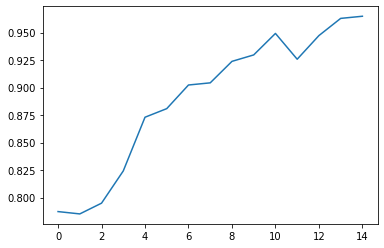

In [ ]:
plt.plot(history.history['accuracy'])
plt.show()

In [ ]:
print(test)

[0.1488766372203827, 0.9477089047431946]


In [ ]:
# My accuracy increased from changing the learning rate and epochs, so I want to try batch normalization next to bring it even higher